#Introduction
This report is to demonstrate the ability to use and apply common big data tools techniques. The implementation of standard data analysis process as follows: Loading the data, Cleansing the data, Analysis, Visualisation / Reporting and use of Python, SQL and Linux terminal commands.

The following datasets that are going to be used to carry out the task are: Accidents 2017, Casualties 2017 and Vehicles 2017.  The following techniques and tools are going to be applied:
The ability to use Linus – Cloudera VM
The Accidents 2017 and Casualties 2017 datasets are going to be dumbed into MYSQL then import into Hive 
The Vehicles 2017 dataset is going to be imported Vehicles table from CSV (on HDFS) into Hive
Implementing a single script that executes the entire process of loading the supplied data to exporting the result data required for visualisation using Pyspark with Jupyter notebook.
Implementing SQL analysis using Sqoop, Hive and Impala
Installing and importing Pandas, Seaborn and Matplotlib for visualisation 
Using Python in Databricks to carry out SQL for visualisation.


#What is Big Data
According to Gartner’s definition “Big data is data that contains greater variety arriving in increasing volumes and with ever-higher velocity. This is known as the three Vs.” circa 2001 (https://www.oracle.com/uk/big-data/guide/what-is-big-data.html)
Basically, big data is gigantic, has more complexity of data sets, particularly a newly data sources. These data sets are so large that outdated data processing software just cannot manage them. But these immense volumes of data can be used to address business problems we wouldn’t have been able to confront before.

#Velocity
Velocity is the rapid rate of receiving and (possibly) acting on data. Normally, data streams at the highest velocity directly into memory versus written to disk. Some smart products that are enabled on the Internet operate in real time or near real time and require evaluation and action in real time.

#Volume
The size of data matters. With large data, you will have to handle large quantities of low-density, unstructured data. This can be an unknown value data, such as Twitter data feeds, webpage or mobile phone apps, or sensor-enabled machinery. This may be dozens of terabytes of data for some organisations. It may be hundreds of petabytes for others.

#Variety
Variety relates to the many kinds of information accessible. In a relational database, traditional data types are structured and fit smoothly. With the rise of big data, data comes in new unstructured types of data. In order to derive meaning and support metadata, unstructured and semi-structured data types such as text, audio, and video require additional pre-processing.


#Big Data and Data Analytics Benefits:
Big data makes it possible for us for the improvement of further complete answers because we have more information.
More full responses imply more confidence in the data—which implies a totally distinct strategy for tackling problems.

#BIG DATA ANALYTICS
<img src="bigdata.png">
#Capabilities of Big Data Analytics:
Enterprise Data Warehousing,Business Intelligence, Predictive Analytics and Real-time Streaming Analytics


#Big Data Challenges
Challenges Facing big data, although big data holds plenty of promise, it does have its challenges.
Primarily, big data is gigantic. though new technologies are developed for big data storage, data volumes are doubling in size regarding each 2 years. Organizations still struggle to stay pace with their data and discover ways in which to effectively store it. It is not enough to simply store the data. Data should be inclined to be valuable which depends on process of selection. 

Clean data, or data that are relevant to the consumer and agreed in a very approach that empowers a meaningful analysis which requires a lot of work. Data scientists spend more of their time curating and preparing data before it can be used.

Lastly, big data technology is changing at a fast pace. Apache Hadoop has been the popular technology used to handle big data for the past few days before Apache Spark was introduced in 2014. Nowadays, a mixture of the two frameworks appears to be the best method. Keeping up with big data technology has always been an ongoing challenge.


# Running Impala and Hive services

In [1]:
!sudo service oozie restart
!sudo service hive-metastore restart
!sudo service hive-server2 restart
!sudo service impala-state-store resstart
!sudo service impala-catalog restart
!sudo service impala-server restart


Setting OOZIE_HOME:          /usr/lib/oozie
Sourcing:                    /usr/lib/oozie/bin/oozie-env.sh
  setting JAVA_LIBRARY_PATH="$JAVA_LIBRARY_PATH:/usr/lib/hadoop/lib/native"
  setting OOZIE_DATA=/var/lib/oozie
  setting OOZIE_CATALINA_HOME=/usr/lib/bigtop-tomcat
  setting CATALINA_TMPDIR=/var/lib/oozie
  setting CATALINA_PID=/var/run/oozie/oozie.pid
  setting CATALINA_BASE=/var/lib/oozie/tomcat-deployment
  setting OOZIE_HTTPS_PORT=11443
  setting OOZIE_HTTPS_KEYSTORE_PASS=password
  setting CATALINA_OPTS="$CATALINA_OPTS -Doozie.https.port=${OOZIE_HTTPS_PORT}"
  setting CATALINA_OPTS="$CATALINA_OPTS -Doozie.https.keystore.pass=${OOZIE_HTTPS_KEYSTORE_PASS}"
  setting CATALINA_OPTS="$CATALINA_OPTS -Xmx128m"
  setting OOZIE_CONFIG=/etc/oozie/conf
  setting OOZIE_LOG=/var/log/oozie
Using   OOZIE_CONFIG:        /etc/oozie/conf
Sourcing:                    /etc/oozie/conf/oozie-env.sh
  setting JAVA_LIBRARY_PATH="$JAVA_LIBRARY_PATH:/usr/lib/hadoop/lib/native"
  setting OOZIE_DATA=/va

# Load the db_bdtt_ac data into created ihayford database 

In [3]:
%%bash
    mysql -utraining -ptraining
    create database ihayfordbdtt;

    use ihayfordbdtt;
     \. db_bdtt_ac

    use ihayfordbdtt;
    show tables;

Tables_in_ihayfordbdtt
accidents
casualties


###Preparing and modifying mysql attributes  Data Types
Using the ALTER statement to modify the the data types from INT to STRING

In [4]:
%%bash
    mysql -utraining -ptraining
    use ihayfordbdtt;
    
    ALTER TABLE accidents MODIFY COLUMN police_force varchar(50);
    ALTER TABLE accidents MODIFY COLUMN accident_severity varchar(50);
    ALTER TABLE accidents MODIFY COLUMN day_of_week varchar(50);
    ALTER TABLE accidents MODIFY COLUMN Road_Type varchar(50);
    ALTER TABLE accidents MODIFY COLUMN Local_Authority_District varchar(50);
    
    ALTER TABLE casualties MODIFY COLUMN casualty_severity varchar(50);
    ALTER TABLE casualties MODIFY COLUMN Age_Band_of_Casualty varchar(50);
    
    

### Preparing and cleaning tables by updating Rows refrencing from the Road-Accident-Safety-Data-Guide.xls
Using Mysql UPDATE, SET statement to replace values in rows in other get approperate rows names"

In [5]:
%%bash
    mysql -utraining -ptraining
    use ihayfordbdtt;

    UPDATE accidents SET Police_Force = "Kent" WHERE Police_Force = 46;
    UPDATE accidents SET Police_Force = "Thames Valley" WHERE Police_Force = 43;
    UPDATE accidents SET Police_Force = "Devon and Cornwall" WHERE Police_Force = 50;
    UPDATE accidents SET Police_Force = "West Midlands" WHERE Police_Force = 20;
    UPDATE accidents SET Police_Force = "West Yorkshire" WHERE Police_Force = 13;
    UPDATE accidents SET Police_Force = "Metropolitan Police" WHERE Police_Force = 1;

    UPDATE accidents SET day_of_week = "Sunday" WHERE day_of_week = 1;
    UPDATE accidents SET day_of_week = "Monday" WHERE day_of_week = 2;
    UPDATE accidents SET day_of_week = "Tuesday" WHERE day_of_week = 3;
    UPDATE accidents SET day_of_week = "Wednesday" WHERE day_of_week = 4;
    UPDATE accidents SET day_of_week = "Thursday" WHERE day_of_week = 5;
    UPDATE accidents SET day_of_week = "Friday" WHERE day_of_week = 6;
    UPDATE accidents SET day_of_week = "Saturday" WHERE day_of_week = 7;
    
    UPDATE accidents SET Road_Type = "One way street/Slip road" WHERE Road_Type = 12;
    UPDATE accidents SET Road_Type = "Unknown" WHERE Road_Type = 9;
    UPDATE accidents SET Road_Type = "Slip road" WHERE Road_Type = 7;
    UPDATE accidents SET Road_Type = "Single carriageway" WHERE Road_Type = 6;
    UPDATE accidents SET Road_Type = "Dual carriageway" WHERE Road_Type = 3;
    UPDATE accidents SET Road_Type = "One way street" WHERE Road_Type = 2;
    UPDATE accidents SET Road_Type = "Data missing or out of range" WHERE Road_Type = -1;
    UPDATE accidents SET Road_Type = "Roundabout" WHERE Road_Type = 1;


    UPDATE accidents SET accident_severity = "Fatal" WHERE accident_severity = 1;
    UPDATE accidents SET accident_severity = "Serious" WHERE accident_severity = 2;
    UPDATE accidents SET accident_severity = "Slight" WHERE accident_severity = 3;

    
    UPDATE accidents SET Local_Authority_District = "West Lindsey" WHERE Local_Authority_District = 356;
    UPDATE accidents SET Local_Authority_District = "Aylesbury Vale" WHERE Local_Authority_District = 476;
    UPDATE accidents SET Local_Authority_District = "Cheshire West and Chester" WHERE Local_Authority_District = 130;
    UPDATE accidents SET Local_Authority_District = "Shropshire" WHERE Local_Authority_District = 286;
    UPDATE accidents SET Local_Authority_District = "Birmingham" WHERE Local_Authority_District = 300;
    UPDATE accidents SET Local_Authority_District = "Leeds" WHERE Local_Authority_District = 204;
    UPDATE accidents SET Local_Authority_District = "Sheffield" WHERE Local_Authority_District = 215;
    UPDATE accidents SET Local_Authority_District = "Cornwall" WHERE Local_Authority_District = 596;
    UPDATE accidents SET Local_Authority_District = "Mansfield" WHERE Local_Authority_District = 344;
    UPDATE accidents SET Local_Authority_District = "Wakefield" WHERE Local_Authority_District = 206;
    UPDATE accidents SET Local_Authority_District = "Nottingham" WHERE Local_Authority_District = 346;
    UPDATE accidents SET Local_Authority_District = "Daventry" WHERE Local_Authority_District = 381;
    UPDATE accidents SET Local_Authority_District = "Conwy" WHERE Local_Authority_District = 721;
    UPDATE accidents SET Local_Authority_District = "Powys" WHERE Local_Authority_District = 753;
    UPDATE accidents SET Local_Authority_District = "Highland" WHERE Local_Authority_District = 927;
    UPDATE accidents SET Local_Authority_District = "Westminster" WHERE Local_Authority_District = 1;
    
    
    UPDATE casualties SET casualty_severity = "Fatal" WHERE casualty_severity = 1;
    UPDATE casualties SET casualty_severity = "Serious" WHERE casualty_severity = 2;
    UPDATE casualties SET casualty_severity = "Slight" WHERE casualty_severity = 3;
    
    UPDATE casualties SET age_band_of_casualty = "66 - 75" WHERE age_band_of_casualty = 10;
    UPDATE casualties SET Age_Band_of_Casualty = "21 - 25" WHERE Age_Band_of_Casualty = 5;
    UPDATE casualties SET Age_Band_of_Casualty = "26 - 35" WHERE Age_Band_of_Casualty = 6;
    UPDATE casualties SET Age_Band_of_Casualty = "36 - 45" WHERE Age_Band_of_Casualty = 7;
    UPDATE casualties SET Age_Band_of_Casualty = "46 - 55" WHERE Age_Band_of_Casualty = 8;

# Import Vehicles CSV table  to HDFS
Creating new directory called vehicles in HDFS  and and imported the vihicles csv file into it

In [6]:
!hdfs dfs -mkdir /user/hdfs/vehicles 
!hdfs dfs -put Veh1.csv /user/hdfs/vehicles

# Import Accidents table from MYSQL to HDFS using Sqoop
Using Sqoop to import the Accidents table from Mysql and specifying the drictory to be imported into which is the user/hdfs 

In [7]:
!sqoop-import \
    --connect jdbc:mysql://localhost/ihayfordbdtt\
    --username training\
    --password training\
    --table accidents\
    --target-dir /user/hdfs/accidents\
    --fields-terminated-by ',' \
    --lines-terminated-by '\n' \
    --null-string 'null' \
    -m 1 

19/05/10 06:50:55 INFO sqoop.Sqoop: Running Sqoop version: 1.4.5-cdh5.4.3
19/05/10 06:50:55 WARN tool.BaseSqoopTool: Setting your password on the command-line is insecure. Consider using -P instead.
19/05/10 06:50:55 INFO manager.MySQLManager: Preparing to use a MySQL streaming resultset.
19/05/10 06:50:55 INFO tool.CodeGenTool: Beginning code generation
19/05/10 06:50:55 INFO manager.SqlManager: Executing SQL statement: SELECT t.* FROM `accidents` AS t LIMIT 1
19/05/10 06:50:55 INFO manager.SqlManager: Executing SQL statement: SELECT t.* FROM `accidents` AS t LIMIT 1
19/05/10 06:50:55 INFO orm.CompilationManager: HADOOP_MAPRED_HOME is /usr/lib/hadoop-mapreduce
Note: /tmp/sqoop-training/compile/dfc1374a69ef46702cf0d529885801ff/accidents.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
19/05/10 06:50:57 INFO orm.CompilationManager: Writing jar file: /tmp/sqoop-training/compile/dfc1374a69ef46702cf0d529885801ff/accidents.jar
19/05/10 06:50:57 W

# Import Casualties table from MYSQL to HDFS  using Sqoop
Using Sqoop to import the Casualties table from Mysql and specifying the drictory to be imported into which is the user/hdfs

In [8]:
!sqoop-import \
    --connect jdbc:mysql://localhost/ihayfordbdtt\
    --username training\
    --password training\
    --table casualties\
    --target-dir /user/hdfs/casualties\
    --fields-terminated-by ',' \
    --lines-terminated-by '\n' \
    --null-string 'null' \
    -m 1 

19/05/10 06:51:25 INFO sqoop.Sqoop: Running Sqoop version: 1.4.5-cdh5.4.3
19/05/10 06:51:25 WARN tool.BaseSqoopTool: Setting your password on the command-line is insecure. Consider using -P instead.
19/05/10 06:51:25 INFO manager.MySQLManager: Preparing to use a MySQL streaming resultset.
19/05/10 06:51:25 INFO tool.CodeGenTool: Beginning code generation
19/05/10 06:51:25 INFO manager.SqlManager: Executing SQL statement: SELECT t.* FROM `casualties` AS t LIMIT 1
19/05/10 06:51:25 INFO manager.SqlManager: Executing SQL statement: SELECT t.* FROM `casualties` AS t LIMIT 1
19/05/10 06:51:25 INFO orm.CompilationManager: HADOOP_MAPRED_HOME is /usr/lib/hadoop-mapreduce
Note: /tmp/sqoop-training/compile/b5072c4640ef08d0dc64ac4e39971369/casualties.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
19/05/10 06:51:27 INFO orm.CompilationManager: Writing jar file: /tmp/sqoop-training/compile/b5072c4640ef08d0dc64ac4e39971369/casualties.jar
19/05/10 06:51:

## Create ihayford_hive database in Hive
Creating new database called ihayford_hive in Hive using hive query

In [9]:
!hive -e "CREATE DATABASE ihayford_hive;"


Logging initialized using configuration in file:/etc/hive/conf.dist/hive-log4j.properties
OK
Time taken: 1.952 seconds


## Creating accidents_hive table in ihayford_hive database using Hive
Creating new empty table called accidents_hive within ihayford_hive database in Hive using hive query

In [10]:
%%bash
hive -e "USE ihayford_hive; CREATE TABLE accidents_hive
(
  Accident_Index    STRING,
  Location_Easting_OSGR    INT,
  Location_Northing_OSGR   INT,
  Longitude	   DOUBLE,
  Latitude	   DOUBLE,
  Police_Force	  STRING,
  Accident_Severity   STRING,
  Number_of_Vehicles  INT,
  Number_of_Casualties  INT,
  Date STRING,
  Day_of_Week	STRING,
  Time  	  STRING,
  Local_Authority_District  STRING,
  Local_Authority_Highway  STRING,
  1st_Road_Class	 INT,
  1st_Road_Number	 INT,
  Road_Type	  STRING,
  Speed_limit	  INT,
  Junction_Detail	INT,
  Junction_Control	INT,
  2nd_Road_Class	INT,
  2nd_Road_Number	INT,
  Pedestrian_Crossing_Human_Control	 INT,
  Pedestrian_Crossing_Physical_Facilities   INT,
  Light_Conditions	INT,
  Weather_Conditions	INT,
  Road_Surface_Conditions	INT,
  Special_Conditions_at_Site	INT,
  Carriageway_Hazards	INT,
  Urban_or_Rural_Area	INT,
  Did_Police_Officer_Attend_Scene_of_Accident	INT,
  LSOA_of_Accident_Location   STRING
)
ROW FORMAT DELIMITED 
FIELDS TERMINATED BY ','
LINES TERMINATED BY '\n'         
TBLPROPERTIES('skip.header.line.count'='1');"


Logging initialized using configuration in file:/etc/hive/conf.dist/hive-log4j.properties
OK
Time taken: 0.444 seconds
OK
Time taken: 0.327 seconds


## Load accidents data from HDFS into accidents_hive table  using Hive
Using the \"load data inpath\" statement to load accidents data from HDFS into accidents_hive table  using Hive

In [11]:
%%bash
hive -e "LOAD DATA INPATH '/user/hdfs/accidents/part-m-00000' INTO TABLE ihayford_hive.accidents_hive;"


Logging initialized using configuration in file:/etc/hive/conf.dist/hive-log4j.properties
Loading data to table ihayford_hive.accidents_hive
chgrp: changing ownership of 'hdfs://localhost:8020/user/hive/warehouse/ihayford_hive.db/accidents_hive/part-m-00000': User does not belong to hive
Table ihayford_hive.accidents_hive stats: [numFiles=1, totalSize=23323094]
OK
Time taken: 0.952 seconds


# Creating casualties_hive table in ihayford_hive database using Hive
Creating new empty table called casualties_hive table within ihayford_hive database in Hive using hive query

In [12]:
%%bash
hive -e "USE ihayford_hive; CREATE TABLE casualties_hive
(
  Accident_Index	STRING,
  Vehicle_Reference   INT,
  Casualty_Reference	INT,
  Casualty_Class	INT,
  Sex_of_Casualty	INT,
  Age_of_Casualty	INT,
  Age_Band_of_Casualty	STRING,
  Casualty_Severity	  STRING,
  Pedestrian_Location	INT,
  Pedestrian_Movement 	INT,
  Car_Passenger	  INT,
  Bus_or_Coach_Passenger   INT,	
  Pedestrian_Road_Maintenance_Worker	INT,
  Casualty_Type	  INT,
  Casualty_Home_Area_Type	INT,
  Casualty_IMD_Decile   INT
)  

ROW FORMAT DELIMITED 
FIELDS TERMINATED BY ','
LINES TERMINATED BY '\n'         
TBLPROPERTIES('skip.header.line.count'='1');"


Logging initialized using configuration in file:/etc/hive/conf.dist/hive-log4j.properties
OK
Time taken: 0.419 seconds
OK
Time taken: 0.198 seconds


# Load casualties data from HDFS into casualties_hive table using Hive
Using the \"load data inpath\" statement to load casualties data from HDFS into casualties_hive table using Hive

In [13]:
%%bash
hive -e "LOAD DATA INPATH '/user/hdfs/casualties/part-m-00000' INTO TABLE ihayford_hive.casualties_hive;"


Logging initialized using configuration in file:/etc/hive/conf.dist/hive-log4j.properties
Loading data to table ihayford_hive.casualties_hive
chgrp: changing ownership of 'hdfs://localhost:8020/user/hive/warehouse/ihayford_hive.db/casualties_hive/part-m-00000': User does not belong to hive
Table ihayford_hive.casualties_hive stats: [numFiles=1, totalSize=9366777]
OK
Time taken: 0.884 seconds


# Creating vehicles_hive table in ihayford_hive database using Hive
Creating new empty table called vehicles_hive table within ihayford_hive database in Hive using hive query

In [14]:
%%bash
hive -e "USE ihayford_hive; CREATE TABLE vehicles_hive
(
  Accident_Index	STRING,
  Vehicle_Reference	 INT,
  Vehicle_Type	STRING,
  Towing_and_Articulation	INT,
  Vehicle_Manoeuvre	 INT,
  Vehicle_Location_Restricted_Lane	INT,
  Junction_Location	 INT,
  Skidding_and_Overturning	 INT,
  Hit_Object_in_Carriageway	 INT,
  Vehicle_Leaving_Carriageway	INT,
  Hit_Object_off_Carriageway	INT,
  1st_Point_of_Impact	INT,
  Was_Vehicle_Left_Hand_Drive 	INT,
  Journey_Purpose_of_Driver	  INT,
  Sex_of_Driver	 INT,
  Age_of_Driver	 INT,
  Age_Band_of_Driver	INT,
  Engine_Capacity_CC   INT,
  Propulsion_Code	INT,
  Age_of_Vehicle	INT,
  Driver_IMD_Decile	  INT,
  Driver_Home_Area_Type	  INT,
  Vehicle_IMD_Decile   INT
  )
  
ROW FORMAT DELIMITED 
FIELDS TERMINATED BY ','
LINES TERMINATED BY '\n'         
TBLPROPERTIES('skip.header.line.count'='1');"


Logging initialized using configuration in file:/etc/hive/conf.dist/hive-log4j.properties
OK
Time taken: 0.372 seconds
OK
Time taken: 0.186 seconds


# Load vehicles data from HDFS into vehicles_hive table using Hive
Using the \"load data inpath\" statement to load vehicles data from HDFS into vehicles_hive table using Hive

In [15]:
%%bash
hive -e "LOAD DATA INPATH '/user/hdfs/vehicles/Veh1.csv' INTO TABLE ihayford_hive.vehicles_hive"


Logging initialized using configuration in file:/etc/hive/conf.dist/hive-log4j.properties
Loading data to table ihayford_hive.vehicles_hive
chgrp: changing ownership of 'hdfs://localhost:8020/user/hive/warehouse/ihayford_hive.db/vehicles_hive/Veh1.csv': User does not belong to hive
Table ihayford_hive.vehicles_hive stats: [numFiles=1, totalSize=17131013]
OK
Time taken: 0.875 seconds


###  View tables in ihayford_hive database using Impala
Using Impala to view created database and tables

In [16]:
!impala-shell -q "invalidate metadata; USE ihayford_hive; SHOW TABLES;"

Starting Impala Shell without Kerberos authentication
Connected to localhost.localdomain:21000
Server version: impalad version 2.2.0-cdh5.4.3 DEBUG (build 517bb0f71cd604a00369254ac6d88394df83e0f6)
Query: invalidate metadata

Fetched 0 row(s) in 2.11s
Query: use ihayford_hive
Query: show TABLES
+-----------------+
| name            |
+-----------------+
| accidents_hive  |
| casualties_hive |
| vehicles_hive   |
+-----------------+
Fetched 3 row(s) in 0.01s


### View the structure of the tables using Impala
Using Impala to view the structure of all tables

In [17]:
!impala-shell -q "invalidate metadata; \
DESC ihayford_hive.accidents_hive; \
DESC ihayford_hive.casualties_hive; \
DESC ihayford_hive.vehicles_hive;"

Starting Impala Shell without Kerberos authentication
Connected to localhost.localdomain:21000
Server version: impalad version 2.2.0-cdh5.4.3 DEBUG (build 517bb0f71cd604a00369254ac6d88394df83e0f6)
Query: invalidate metadata

Fetched 0 row(s) in 1.42s
Query: describe ihayford_hive.accidents_hive
+---------------------------------------------+--------+---------+
| name                                        | type   | comment |
+---------------------------------------------+--------+---------+
| accident_index                              | string |         |
| location_easting_osgr                       | int    |         |
| location_northing_osgr                      | int    |         |
| longitude                                   | double |         |
| latitude                                    | double |         |
| police_force                                | string |         |
| accident_severity                           | string |         |
| number_of_vehicles              

## Installing Pandas, Seaborn and Matplotlib packages
Installing extra packages or libraries - Pandas, Seaborn and matplotlib to for visualisation

In [18]:
!sudo pip install pip --upgrade
!sudo pip install pandas 
!sudo pip install seaborn
!sudo pip install matplotlib

/usr/local/lib/python2.7/site-packages/pip-7.1.2-py2.7.egg/pip/_vendor/requests/packages/urllib3/util/ssl_.py:90: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. For more information, see https://urllib3.readthedocs.org/en/latest/security.html#insecureplatformwarning.
  InsecurePlatformWarning
/usr/local/lib/python2.7/site-packages/pip-7.1.2-py2.7.egg/pip/_vendor/requests/packages/urllib3/util/ssl_.py:90: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. For more information, see https://urllib3.readthedocs.org/en/latest/security.html#insecureplatformwarning.
  InsecurePlatformWarning
/usr/local/lib/python2.7/site-packages/pip-7.1.2-py2.7.egg/pip/_vendor/requests/packages/urllib3/util/ssl_.py:90: InsecurePlatformWarning: A true SSLContext objec

## Importing Pandas, Seaborn and Matplotlib \n",
Packages/libraries has to be imported after the installation of the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [41]:
# To force impala to recognise databases in hive or metadatastore
!impala-shell -q "INVALIDATE METADATA"

Starting Impala Shell without Kerberos authentication
Connected to localhost.localdomain:21000
Server version: impalad version 2.2.0-cdh5.4.3 DEBUG (build 517bb0f71cd604a00369254ac6d88394df83e0f6)
Query: invalidate METADATA

Fetched 0 row(s) in 1.32s


#Using Impala query statements for analysis, exporting the results as csv and using Pandas Dataframe to display the results and visualise with Seaborn
Using Pandas to load the created csv file into data frame to display the results, using Seaborn to visualise the results from the data frame while matplotlib inline keeps the visualisation within the Jupyter notebook without opening a new window

# 1. Find the top 3 Police Force that have most the Fatal Accidents
Using impala sql to statements to fetch the top 3 Police Force that have most the Fatal Accidents and exporting the results as a csv file"

In [21]:
%%sh
impala-shell -B '--output_delimiter=,' -q "invalidate metadata; USE ihayford_hive; SELECT police_force, COUNT(*) 
AS MOST_FATAL FROM accidents_hive 
WHERE accident_severity = 'Fatal' 
GROUP BY police_force 
ORDER BY MOST_FATAL 
DESC LIMIT 3;" > que1.csv

Starting Impala Shell without Kerberos authentication
Connected to localhost.localdomain:21000
Server version: impalad version 2.2.0-cdh5.4.3 DEBUG (build 517bb0f71cd604a00369254ac6d88394df83e0f6)
Query: invalidate metadata
Fetched 0 row(s) in 1.42s
Query: use ihayford_hive
Query: select police_force, COUNT(*) 
AS MOST_FATAL FROM accidents_hive 
WHERE accident_severity = 'Fatal' 
GROUP BY police_force 
ORDER BY MOST_FATAL 
DESC LIMIT 3
Fetched 3 row(s) in 2.82s


In [22]:
que1 = pd.read_csv ("que1.csv", names = ( "police_force","most_fatal")) 
que1.head()

,police_force,most_fatal
0,Metropolitan Police,129
1,Thames Valley,59
2,Kent,56


Text(0.5,1,'Police force most_fatal accidents')

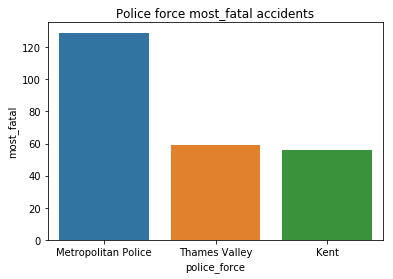

In [23]:
sns.barplot \
(x=que1.police_force, y=que1.most_fatal) \
.set_title ('Police force most_fatal accidents')

# 2.	Find the top 5 Local Authorities that have most Serious Accidents

In [24]:
%%sh
impala-shell -B '--output_delimiter=,' -q "SELECT local_authority_district, 
COUNT(*) 
AS Most_Serious_Accidents 
FROM ihayford_hive.accidents_hive 
WHERE accident_severity = 'Serious' 
GROUP BY local_authority_district 
ORDER BY Most_Serious_Accidents 
DESC LIMIT 5;" > que2.csv

Starting Impala Shell without Kerberos authentication
Connected to localhost.localdomain:21000
Server version: impalad version 2.2.0-cdh5.4.3 DEBUG (build 517bb0f71cd604a00369254ac6d88394df83e0f6)
Query: select local_authority_district, 
COUNT(*) 
AS Most_Serious_Accidents 
FROM ihayford_hive.accidents_hive 
WHERE accident_severity = 'Serious' 
GROUP BY local_authority_district 
ORDER BY Most_Serious_Accidents 
DESC LIMIT 5
Fetched 5 row(s) in 0.54s


In [25]:
que2 = pd.read_csv ("que2.csv", names = ( "local_authority_district","most_serious_accidents")) 
que2.head()

,local_authority_district,most_serious_accidents
0,Birmingham,375
1,Leeds,291
2,Sheffield,279
3,Westminster,259
4,Cornwall,224


Text(0.5,1,'District most_serious_accidents')

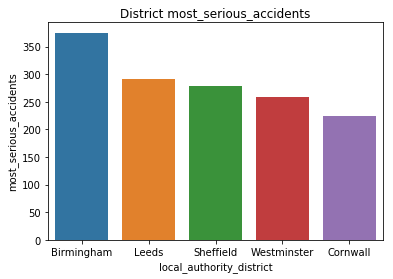

In [26]:
sns.barplot \
(x=que2.local_authority_district, y=que2.most_serious_accidents) \
.set_title ('District most_serious_accidents')

# 3. Find the Vehicle Type that have most Serious and Fatal Accidents.

In [27]:
%%bash
impala-shell -B '--output_delimiter=,' -q "SELECT V.vehicle_type, 
COUNT(*) 
AS Most_Serious_and_Fatal
FROM ihayford_hive.vehicles_hive V 
JOIN ihayford_hive.accidents_hive A 
ON (V.accident_index = A.accident_index) 
WHERE accident_severity = 'Fatal'
OR accident_severity = 'Serious'
GROUP BY V.vehicle_type 
ORDER BY Most_Serious_and_Fatal 
DESC
Limit 3;" > que3.csv

Starting Impala Shell without Kerberos authentication
Connected to localhost.localdomain:21000
Server version: impalad version 2.2.0-cdh5.4.3 DEBUG (build 517bb0f71cd604a00369254ac6d88394df83e0f6)
Query: select V.vehicle_type, 
COUNT(*) 
AS Most_Serious_and_Fatal
FROM ihayford_hive.vehicles_hive V 
JOIN ihayford_hive.accidents_hive A 
ON (V.accident_index = A.accident_index) 
WHERE accident_severity = 'Fatal'
OR accident_severity = 'Serious'
GROUP BY V.vehicle_type 
ORDER BY Most_Serious_and_Fatal 
DESC
Limit 3
Fetched 3 row(s) in 2.26s


In [28]:
que3 = pd.read_csv ("que3.csv", names = ( "vehicle_type","Most_Serious_and_Fatality")) 
que3.head()

,vehicle_type,Most_Serious_and_Fatality
0,Car,4450
1,Pedal cycle,647
2,Motorcycle over 500cc,462


Text(0.5,1,'Most serious and fatal of vehicle type')

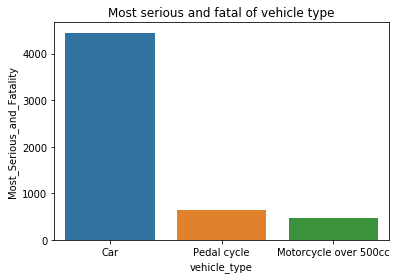

In [29]:
sns.barplot \
(x=que3.vehicle_type, y=que3.Most_Serious_and_Fatality) \
.set_title ('Most serious and fatal of vehicle type')

# 4. Find the Age Band of Casualty that have most Fatal Accidents.

In [30]:
%%bash
impala-shell -B '--output_delimiter=,' -q "SELECT c_h.age_band_of_casualty, 
COUNT(*) 
AS Fatality
FROM ihayford_hive.casualties_hive c_h 
JOIN ihayford_hive.accidents_hive a_h 
ON (c_h.accident_index = a_h.accident_index) 
WHERE accident_severity = 'Fatal' 
GROUP BY c_h.age_band_of_casualty 
ORDER BY Fatality DESC
Limit 4;" > que4.csv

Starting Impala Shell without Kerberos authentication
Connected to localhost.localdomain:21000
Server version: impalad version 2.2.0-cdh5.4.3 DEBUG (build 517bb0f71cd604a00369254ac6d88394df83e0f6)
Query: select c_h.age_band_of_casualty, 
COUNT(*) 
AS Fatality
FROM ihayford_hive.casualties_hive c_h 
JOIN ihayford_hive.accidents_hive a_h 
ON (c_h.accident_index = a_h.accident_index) 
WHERE accident_severity = 'Fatal' 
GROUP BY c_h.age_band_of_casualty 
ORDER BY Fatality DESC
Limit 4
Fetched 4 row(s) in 2.94s


In [31]:
que4 = pd.read_csv ("que4.csv", names = ( "age_band_of_casualty","Fatality")) 
que4.head()

,age_band_of_casualty,Fatality
0,26 - 35,504
1,46 - 55,373
2,36 - 45,343
3,11,329


Text(0.5,1,'Most age band fatality')

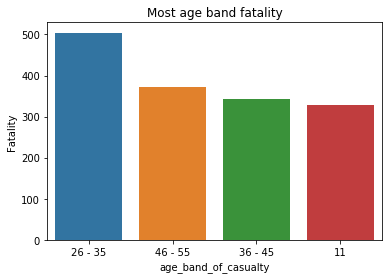

In [32]:
sns.barplot \
(x=que4.age_band_of_casualty, y=que4.Fatality) \
.set_title ('Most age band fatality')

## 5.	Group and display the Slight Accidents by Day of Week in West Yorkshire Police Force Area.

In [33]:
%%bash
impala-shell -B '--output_delimiter=,' -q "SELECT day_of_week, 
COUNT(*) 
AS Slight_Accidents_By_Day_In_Yorkshire_Police_force 
FROM ihayford_hive.accidents_hive 
WHERE accident_severity = 'Slight' 
AND police_force = 'West Yorkshire' 
GROUP BY day_of_week 
ORDER BY Slight_Accidents_By_Day_In_Yorkshire_Police_force;" > que5.csv

Starting Impala Shell without Kerberos authentication
Connected to localhost.localdomain:21000
Server version: impalad version 2.2.0-cdh5.4.3 DEBUG (build 517bb0f71cd604a00369254ac6d88394df83e0f6)
Query: select day_of_week, 
COUNT(*) 
AS Slight_Accidents_By_Day_In_Yorkshire_Police_force 
FROM ihayford_hive.accidents_hive 
WHERE accident_severity = 'Slight' 
AND police_force = 'West Yorkshire' 
GROUP BY day_of_week 
ORDER BY Slight_Accidents_By_Day_In_Yorkshire_Police_force
Fetched 7 row(s) in 0.64s


In [34]:
que5 = pd.read_csv ("que5.csv", names = ( "day_of_week","Slight_Accidents_By_Day_In_Yorkshire_Police_force")) 
que5.head()

,day_of_week,Slight_Accidents_By_Day_In_Yorkshire_Police_force
0,Sunday,379
1,Monday,501
2,Saturday,502
3,Tuesday,521
4,Thursday,530


Text(0.5,1,'Yorkshire police force slight accidents')

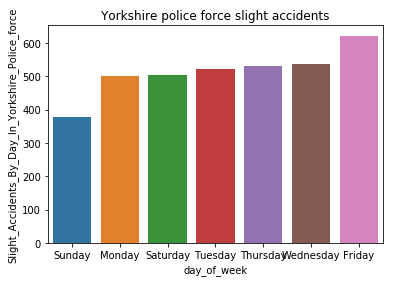

In [35]:
sns.barplot \
(x=que5.day_of_week, y=que5.Slight_Accidents_By_Day_In_Yorkshire_Police_force) \
.set_title ('Yorkshire police force slight accidents')

# 6. Find the peak hour that have most Fatal Accidents in Dual carriageway.

In [36]:
%%bash
impala-shell -B '--output_delimiter=,' -q "SELECT STRLEFT(time, 2),
COUNT(*) 
AS Fatal_Accident_in_Dual_Carriageway  
FROM ihayford_hive.accidents_hive 
WHERE accident_severity = 'Fatal' 
AND road_type = 'Dual carriageway'
GROUP BY STRLEFT(time, 2)
ORDER BY Fatal_Accident_in_Dual_Carriageway
DESC 
LIMIT 3;" > que6.csv

Starting Impala Shell without Kerberos authentication
Connected to localhost.localdomain:21000
Server version: impalad version 2.2.0-cdh5.4.3 DEBUG (build 517bb0f71cd604a00369254ac6d88394df83e0f6)
Query: select STRLEFT(time, 2),
COUNT(*) 
AS Fatal_Accident_in_Dual_Carriageway  
FROM ihayford_hive.accidents_hive 
WHERE accident_severity = 'Fatal' 
AND road_type = 'Dual carriageway'
GROUP BY STRLEFT(time, 2)
ORDER BY Fatal_Accident_in_Dual_Carriageway
DESC 
LIMIT 3
Fetched 3 row(s) in 0.52s


In [37]:
que6 = pd.read_csv ("que6.csv", names = ( "time","fatal_accident_in_dual_carriageway")) 
que6.head()

,time,fatal_accident_in_dual_carriageway
0,19,23
1,17,23
2,14,22


Text(0.5,1,'dual carriageway fatality')

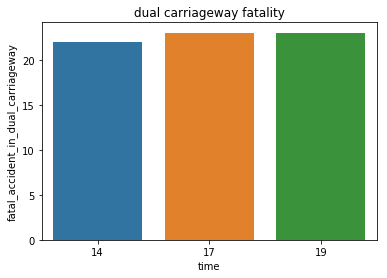

In [38]:
sns.barplot \
(x=que6.time, y=que6.fatal_accident_in_dual_carriageway) \
.set_title ('dual carriageway fatality')

# 7. Find the area(Local_Authority) that have most Fatal Motorcycle Accidents 

In [40]:
%%bash
impala-shell -B '--output_delimiter=,' -q "invalidate metadata; SELECT ac.local_authority_district, 
COUNT(*) 
AS fatal_moto_accidents 
FROM ihayford_hive.accidents_hive ac 
INNER JOIN ihayford_hive.vehicles_hive ve 
ON ac.accident_index = ve.accident_index 
WHERE ac.accident_severity = 'Fatal' 
AND ve.vehicle_type 
IN ('Motorcycle 50cc and under rider or passenger','Motorcycle 125cc and under rider or passenger',\
'Motorcycle over 125cc and up to 500cc rider or  passenger','Motorcycle over 500cc rider or passenger','Electric motorcycle rider or passenger',\
'Motorcycle - unknown cc rider or passenger') 
GROUP BY ac.local_authority_district 
ORDER BY fatal_moto_accidents DESC
Limit 3;" > que7.csv
 

Starting Impala Shell without Kerberos authentication
Connected to localhost.localdomain:21000
Server version: impalad version 2.2.0-cdh5.4.3 DEBUG (build 517bb0f71cd604a00369254ac6d88394df83e0f6)
Query: invalidate metadata
Fetched 0 row(s) in 1.91s
Query: select ac.local_authority_district, 
COUNT(*) 
AS fatal_moto_accidents 
FROM ihayford_hive.accidents_hive ac 
INNER JOIN ihayford_hive.vehicles_hive ve 
ON ac.accident_index = ve.accident_index 
WHERE ac.accident_severity = 'Fatal' 
AND ve.vehicle_type 
IN ('Motorcycle 50cc and under rider or passenger','Motorcycle 125cc and under rider or passenger','Motorcycle over 125cc and up to 500cc rider or  passenger','Motorcycle over 500cc rider or passenger','Electric motorcycle rider or passenger','Motorcycle - unknown cc rider or passenger') 
GROUP BY ac.local_authority_district 
ORDER BY fatal_moto_accidents DESC
Limit 3
Fetched 0 row(s) in 4.83s


In [1]:
que7 = pd.read_csv ("que7.csv", names = ( "local_authority_district","fatal_moto_accidents")) 
que7.head()

NameError: name 'pd' is not defined

#Conclusion
Since data comes in the form of voluminous unstructured and semi-structured data, the best way to gain valuable information is to be able to use and apply different tools, software and techniques.  These techniques have been applied to carried out the task. The use of SQL to import data, using Sqoop to import data from MYSQL to HDFS, able to use Hive to create database and tables and imported the HDFS data files with “LOAD DATA INPATH”.
Impala SQL analysis appeared to be faster than that of Hive while both uses appeared to be using the same Metastore.
Combining Packages or libraries like Pandas and Seaborn allowed to visualisation to implemented in Jupyter notebook. Another visualisation was implemented in Databricks using Spark query language from the imported csv files.


#References
Introduction to Big Data. (2019). www.ntnu.no. [online] Available at: https://www.ntnu.no/iie/fag/big/lessons/lesson2.pdf [Accessed 3 Jan. 2019]. 

Overview. (2019). CogniFit. [online] Available at: https://impala.apache.org/overview.html [Accessed 8 May. 2019]. 

Apache Sqoop. (2019). sqoop.apache.org. [online] Available at: https://sqoop.apache.org/ [Accessed 3 May. 2019].

Apache Spark. (2019). spark.apache.org. [online] Available at: https://spark.apache.org [Accessed 2 May. 2019]. 

Apache Hadoop. (2019). hadoop.apache.org. [online] Available at: https://hadoop.apache.org [Accessed 4 May. 2019]. 

BIG DATA ANALYTICS. (2019). progressive.in. [online] Available at: https://progressive.in/big-data-analytics [Accessed 3 May. 2019]. 

